# 汽车质量评估

In [33]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

In [26]:
path = '../data/car.data.txt'
X, count = [], 0
with open(path, 'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)
X = np.array(X)
X

array([['vhigh', 'vhigh', '2', ..., 'small', 'low', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'med', 'unacc'],
       ['vhigh', 'vhigh', '2', ..., 'small', 'high', 'unacc'],
       ...,
       ['low', 'low', '5more', ..., 'big', 'low', 'unacc'],
       ['low', 'low', '5more', ..., 'big', 'med', 'good'],
       ['low', 'low', '5more', ..., 'big', 'high', 'vgood']], dtype='<U5')

In [27]:
# 转换成数值
X_encoded = np.empty(X.shape)  # 创建一个空矩阵，成为数值化的X矩阵
label_encoder = []  # 存放标签编码器
for i, item in enumerate(X[0]):
    label_encoder.append(preprocessing.LabelEncoder())  # 对于7条特征中的每一条特征，都放一个编码器
    X_encoded[:, i] = label_encoder[-1].fit_transform(X[:, i])  # 第i列的所有数值都是第i个编码器经过判断所有列生成的数值
# 转化为int
X = X_encoded[:, :-1].astype(int)  # 数据
y = X_encoded[:, -1].astype(int)  # label

In [28]:
# 训练分类器
params = {
    'n_estimators': 200,
    'max_depth': 8,
    'random_state': 7
}
cf = RandomForestClassifier(**params)
cf.fit(X, y)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=7)

In [29]:
acc = cross_val_score(cf, X, y, scoring='accuracy', cv=3)
print('精度为', 100 * acc.mean(), '%')

精度为 77.66203703703704 %


In [32]:
# three fold cross validation 把数据分3组,轮换着用其中两组数据验证分类器
# 对单一数据编码测试
input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
input_data_encoded = [-1] * len(input_data)
for i, item in enumerate(input_data):
    input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))

input_data_encoded = np.array(input_data_encoded)

op_class = cf.predict([input_data_encoded])
print('输出类型为', label_encoder[-1].inverse_transform(op_class)[0])

输出类型为 unacc


## 超参数验证曲线

In [36]:
# 超参数验证曲线
classifier = RandomForestClassifier(max_depth=4, random_state=7)
parameter_grid = np.linspace(25, 200, 8).astype(int)
train_scores, validation_scores = validation_curve(estimator=classifier,
                                                   X=X,
                                                   y=y,
                                                   param_name='n_estimators',
                                                   param_range=parameter_grid,
                                                   cv=5)
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)


Param: n_estimators
Training scores:
 [[0.80680174 0.80824891 0.80752533 0.80694143 0.81055676]
 [0.79522431 0.80535456 0.81041968 0.80911063 0.81055676]
 [0.80101302 0.80680174 0.81114327 0.81127983 0.81561822]
 [0.8024602  0.80535456 0.81186686 0.80911063 0.8076645 ]
 [0.80028944 0.80463097 0.81114327 0.8076645  0.81272596]
 [0.80390738 0.80535456 0.81041968 0.81127983 0.81706435]
 [0.80390738 0.80463097 0.81114327 0.81344902 0.81778742]
 [0.80390738 0.80607815 0.81114327 0.81344902 0.81778742]]

Param: n_estimators
Validation scores:
 [[0.71098266 0.76589595 0.72543353 0.76811594 0.73333333]
 [0.71098266 0.75433526 0.71965318 0.77101449 0.73333333]
 [0.71098266 0.72254335 0.71965318 0.76521739 0.73623188]
 [0.71098266 0.71387283 0.71965318 0.75942029 0.72753623]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74202899]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74782609]
 [0.71098266 0.74566474 0.71965318 0.75942029 0.74492754]
 [0.71098266 0.75144509 0.71965318 0.75942029 0.7

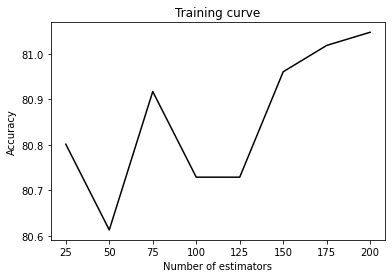

In [37]:
# plot the curve
plt.figure()
plt.plot(parameter_grid,
         100 * np.average(train_scores, axis=1),
         color='black')
plt.title('Training curve')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.show()

In [45]:
# 聚焦到max_depth超参数
# 固定n_estimator为20，查看最大深度造成的影响
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
parameter_grid = np.linspace(2, 20, 5).astype(int)
train_scores, valid_scores = validation_curve(estimator=classifier,
                                              X=X,
                                              y=y,
                                              param_name="max_depth",
                                              param_range=parameter_grid,
                                              cv=5)
print("\nParam: max_depth\nTraining scores:\n", train_scores)
print("\nParam: max_depth\nValidation scores:\n", validation_scores)


Param: max_depth
Training scores:
 [[0.71852388 0.70043415 0.70043415 0.69992769 0.69992769]
 [0.90665702 0.91027496 0.92836469 0.89949385 0.90310918]
 [1.         0.99638205 1.         1.         0.99855387]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]

Param: max_depth
Validation scores:
 [[0.71098266 0.76589595 0.72543353 0.76811594 0.73333333]
 [0.71098266 0.75433526 0.71965318 0.77101449 0.73333333]
 [0.71098266 0.72254335 0.71965318 0.76521739 0.73623188]
 [0.71098266 0.71387283 0.71965318 0.75942029 0.72753623]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74202899]
 [0.71098266 0.74277457 0.71965318 0.75942029 0.74782609]
 [0.71098266 0.74566474 0.71965318 0.75942029 0.74492754]
 [0.71098266 0.75144509 0.71965318 0.75942029 0.75072464]]


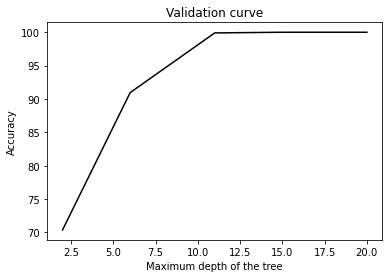

In [46]:
plt.figure()
plt.plot(parameter_grid,
         100*np.average(train_scores, axis=1),
         color='black')
plt.title('Validation curve')
plt.xlabel('Maximum depth of the tree')
plt.ylabel('Accuracy')
plt.show()

## 学习率曲线

In [49]:
classifier = RandomForestClassifier(random_state=7)
parameter_grid = np.array([200, 500, 800, 1100, 2000, 3000, 5000])
train_scores, validation_scores = validation_curve(estimator=classifier,
                                                   X=X,
                                                   y=y,
                                                   param_name="n_estimators",
                                                   param_range=parameter_grid,
                                                   cv=5)
print("\n##### LEARNING CURVES #####")
print("\nTraining scores:\n", train_scores)
print("\nValidation scores:\n", validation_scores)


##### LEARNING CURVES #####

Training scores:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

Validation scores:
 [[0.63294798 0.79190751 0.81213873 0.85507246 0.89565217]
 [0.70231214 0.78901734 0.82080925 0.85797101 0.89565217]
 [0.65317919 0.78901734 0.82369942 0.86086957 0.89565217]
 [0.64739884 0.78323699 0.82080925 0.85507246 0.89565217]
 [0.65317919 0.78323699 0.8150289  0.85797101 0.89565217]
 [0.64739884 0.78034682 0.82080925 0.85797101 0.89565217]
 [0.65606936 0.78323699 0.82080925 0.85217391 0.89565217]]


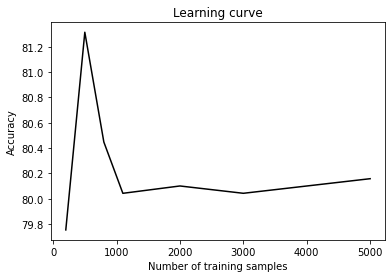

In [56]:
plt.figure()
plt.plot(parameter_grid, 100*np.average(validation_scores, axis=1), color='black')
plt.title('Learning curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()